In [1]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img
import matplotlib.pyplot as plt
import keras
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
import seaborn as sns




### Paths to dataset folders

In [4]:
dataset_dir = 'dataset'
train_dir = os.path.join(dataset_dir, 'train')
test_dir = os.path.join(dataset_dir, 'test')

print(f"Train Directory: {train_dir}")
print(f"Test Directory: {test_dir}")


Train Directory: dataset\train
Test Directory: dataset\test


## Data Augmentation
#### Defining image dimentions and batch size


Found 2704 images belonging to 3 classes.


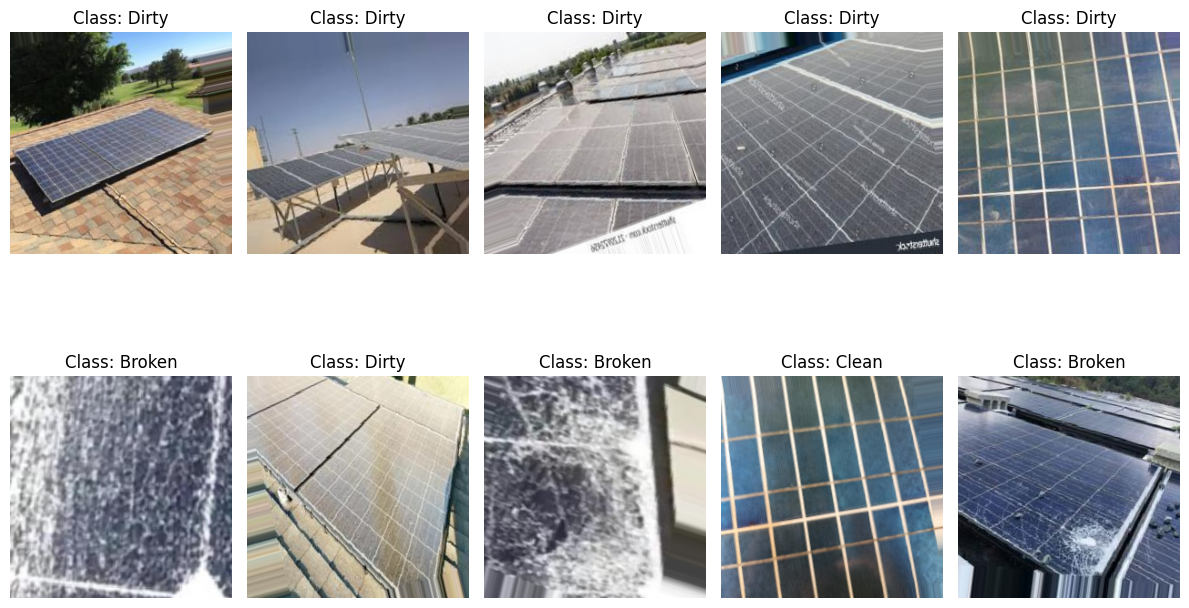

In [5]:
image_size = (244, 244)  # Resize images
batch_size = 32


datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,  
    width_shift_range=0.1, 
    height_shift_range=0.1,
    zoom_range=[0.9, 1.1],
    horizontal_flip=True,
    validation_split=0.1
)


sample_batch = datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=10,  
    class_mode='categorical'
)


images, labels = next(sample_batch)


class_indices = sample_batch.class_indices
class_names = {v: k for k, v in class_indices.items()}


plt.figure(figsize=(12, 8))
for i in range(10): 
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[i])
    plt.title(f"Class: {class_names[np.argmax(labels[i])]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


### Loading the training and testing data

In [6]:

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training', 
    shuffle=True
)

validation_generator = datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation', 
    shuffle=False
)

test_generator = ImageDataGenerator(rescale=1.0 / 255).flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)



print("Class Indices:", train_generator.class_indices)


Found 2435 images belonging to 3 classes.
Found 269 images belonging to 3 classes.
Found 301 images belonging to 3 classes.
Class Indices: {'Broken': 0, 'Clean': 1, 'Dirty': 2}


### Building the CNN model (layers)

In [8]:
num_classes = len(train_generator.class_indices)

def create_model():
    model = keras.models.Sequential([
        keras.layers.Conv2D(32, (3, 3), activation="relu", padding="same", input_shape=(244, 244, 3)),
        keras.layers.MaxPooling2D(2),

        keras.layers.Conv2D(64, (3, 3), activation="relu", padding="same"),
        keras.layers.MaxPooling2D(2),

        keras.layers.Flatten(),
        keras.layers.Dense(128, activation="relu"), 
        keras.layers.Dropout(0.5),

        keras.layers.Dense(num_classes, activation="softmax")
    ])
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model


### Training

In [9]:
train_images, train_labels = [], []
for i in range(len(train_generator)):
    x, y = train_generator[i]
    train_images.append(x)
    train_labels.append(y)

train_images = np.concatenate(train_images)
train_labels = np.concatenate(train_labels)


model = create_model()  


early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


print("\nTraining the model on the full training dataset...")

history = model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)


val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"\nValidation Accuracy: {val_accuracy:.4f}")


C:\Users\rulas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training the model on the full training dataset...


C:\Users\rulas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 175s 2s/step - accuracy: 0.4810 - loss: 3.5314 - val_accuracy: 0.8253 - val_loss: 0.5693
Epoch 2/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.7259 - loss: 0.6387 - val_accuracy: 0.8550 - val_loss: 0.4045
Epoch 3/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 163s 2s/step - accuracy: 0.7900 - loss: 0.5056 - val_accuracy: 0.7770 - val_loss: 0.4647
Epoch 4/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 159s 2s/step - accuracy: 0.8085 - loss: 0.5144 - val_accuracy: 0.8736 - val_loss: 0.3558
Epoch 5/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 157s 2s/step - accuracy: 0.8736 - loss: 0.3747 - val_accuracy: 0.8810 - val_loss: 0.3302
Epoch 6/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 159s 2s/step - accuracy: 0.8607 - loss: 0.3795 - val_accuracy: 0.8810 - val_loss: 0.3109
Epoch 7/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 158s 2s/step - accuracy: 0.8737 - loss: 0.3317 - val_accuracy: 0.9331 - val_loss: 0.2635
Epoch 8/30
77/77 ━━━━━━━━━━━━━━━━━━━━ 158s 2s/step - accuracy: 0.8907 - loss: 0.2979 - val_accuracy: 0.9033 - v

In [10]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Final Test Loss: {test_loss:.4f}, Final Test Accuracy: {test_accuracy:.4f}")


10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 789ms/step - accuracy: 0.8375 - loss: 0.6785
Final Test Loss: 0.7456, Final Test Accuracy: 0.8272


In [11]:
model.save('CNN_model.h5')
print("Model saved as 'CNN_model.h5'.")


Model saved as 'CNN_model.h5'.


### Accuracy and Loss Plots

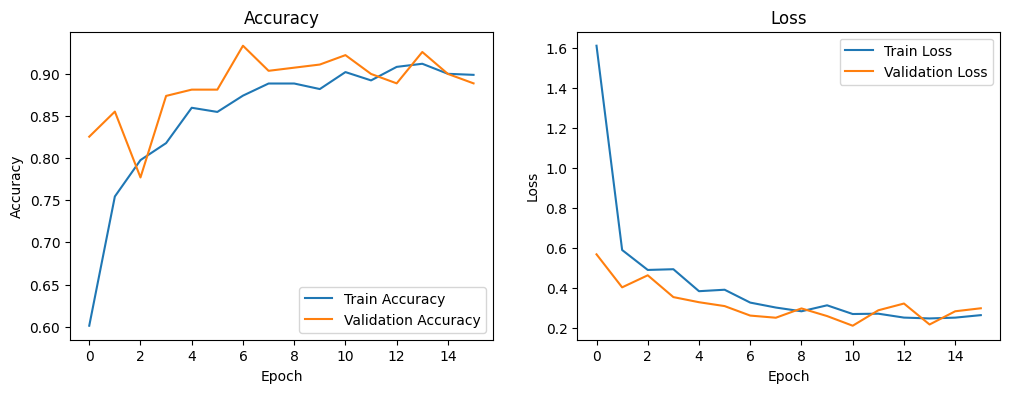

In [12]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


### Confusion Matrix


Generating confusion matrix...
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 358ms/step


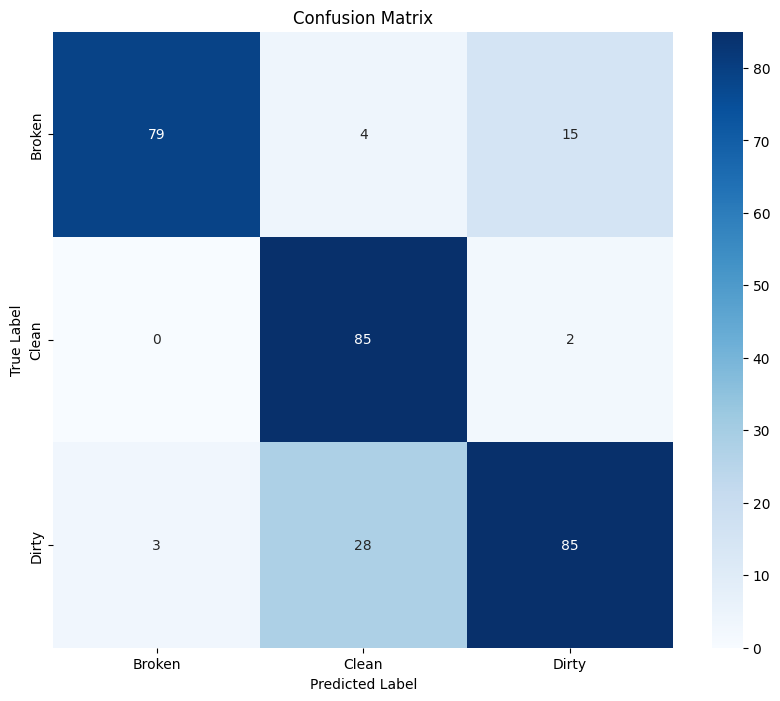

In [13]:
print("\nGenerating confusion matrix...")
y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
conf_matrix = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names.values(), yticklabels=class_names.values())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### F1 Score, Precision, Recall

In [14]:
from sklearn.metrics import classification_report

y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

f1 = f1_score(y_true, y_pred_classes, average="weighted")
print(f"F1 Score: {f1}")

class_names = list(test_generator.class_indices.keys())
class_report = classification_report(y_true, y_pred_classes, target_names=class_names)
print("Classification Report:\n", class_report)


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 301ms/step
F1 Score: 0.8271791954104735
Classification Report:
               precision    recall  f1-score   support

      Broken       0.96      0.81      0.88        98
       Clean       0.73      0.98      0.83        87
       Dirty       0.83      0.73      0.78       116

    accuracy                           0.83       301
   macro avg       0.84      0.84      0.83       301
weighted avg       0.84      0.83      0.83       301



### ROC Curve

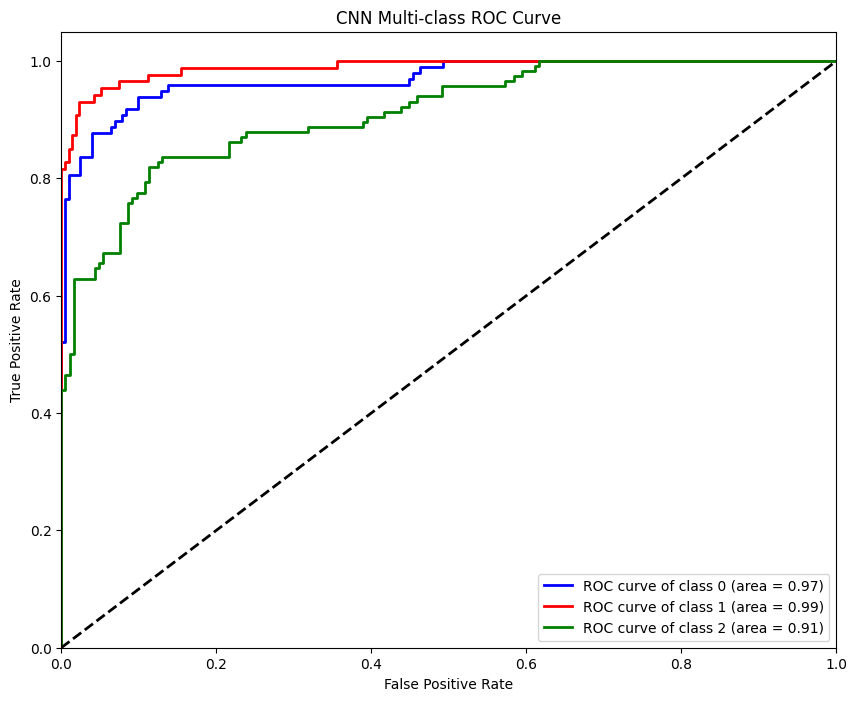

In [16]:
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.utils import to_categorical
from itertools import cycle


y_true = to_categorical(test_generator.classes, num_classes=len(test_generator.class_indices))

fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_true.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))

colors = cycle(['blue', 'red', 'green', 'orange', 'black', 'purple', 'brown', 'pink', 'gray', 'olive'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('CNN Multi-class ROC Curve')
plt.legend(loc="lower right")
plt.show()